In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import os
import re
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score, roc_curve, auc

In [2]:
loan_data=pd.read_csv("D:/1. PG DS IIM  Nagpur Vandy/Project/vehicle_train.csv")

In [3]:
loan_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
loan_data.shape

(233154, 41)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
# Renaming the column
loan_data = loan_data.rename(columns = {"ltv" : "LoanToVehicle",
                                     "Date.of.Birth" : "DOB",
                                     "Employment.Type" : "Employment_Type",
                                     "PRI.NO.OF.ACCTS" : "PRI_NO_ACCTSt",
                                     "PRI.ACTIVE.ACCTS" : "PRI_ACTIVE_ACCTS",
                                     "PRI.OVERDUE.ACCTS" : "PRI_OVERDUE_ACCTS",
                                     "PRI.CURRENT.BALANCE" : "PRI_CURRENT_BALANCE",
                                     "PRI.SANCTIONED.AMOUNT" : "PRI_SANCTIONED_AMOUNT",
                                     "PRI.DISBURSED.AMOUNT" : "PRI_DISBURSED_AMOUNT",
                                     "SEC.NO.OF.ACCTS" : "SEC_NO_ACCTS",
                                     "SEC.ACTIVE.ACCTS" : "SEC_ACTIVE_ACCTS",
                                     "SEC.OVERDUE.ACCTS" : "SEC_OVERDUE_ACCTS",
                                     "SEC.CURRENT.BALANCE" : "SEC_CURRENT_BALANCE",
                                     "SEC.SANCTIONED.AMOUNT" : "SEC_SANCTIONED_AMOUNT",
                                     "SEC.DISBURSED.AMOUNT" : "SEC_DISBURSED_AMOUNT",
                                     "PRIMARY.INSTAL.AMT" : "PRIMARY_INSTAL_AMT",
                                     "SEC.INSTAL.AMT" : "SEC_INSTAL_AMT",
                                     "NEW.ACCTS.IN.LAST.SIX.MONTHS" : "NEW_ACCTS_IN_LAST_SIX_MONTH",
                                     "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS" : "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                                     "AVERAGE.ACCT.AGE" : "AVERAGE_ACCT_AGE",
                                     "CREDIT.HISTORY.LENGTH" : "CREDIT_HISTORY_LENGTH",
                                     "NO.OF_INQUIRIES" : "NO_OF_INQUIRIES",
                                     "PERFORM_CNS.SCORE" : "PERFORM_CNS_SCORE",
                                     "PERFORM_CNS.SCORE.DESCRIPTION" : "PERFORM_CNS_SCORE_DESCRIPTION"})
loan_data.head(5)

,UniqueID,disbursed_amount,asset_cost,LoanToVehicle,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DOB,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTH,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
loan_data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
LoanToVehicle                             0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
DOB                                       0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_ACCTSt                             0
PRI_ACTIVE_ACCTS                

<AxesSubplot:>

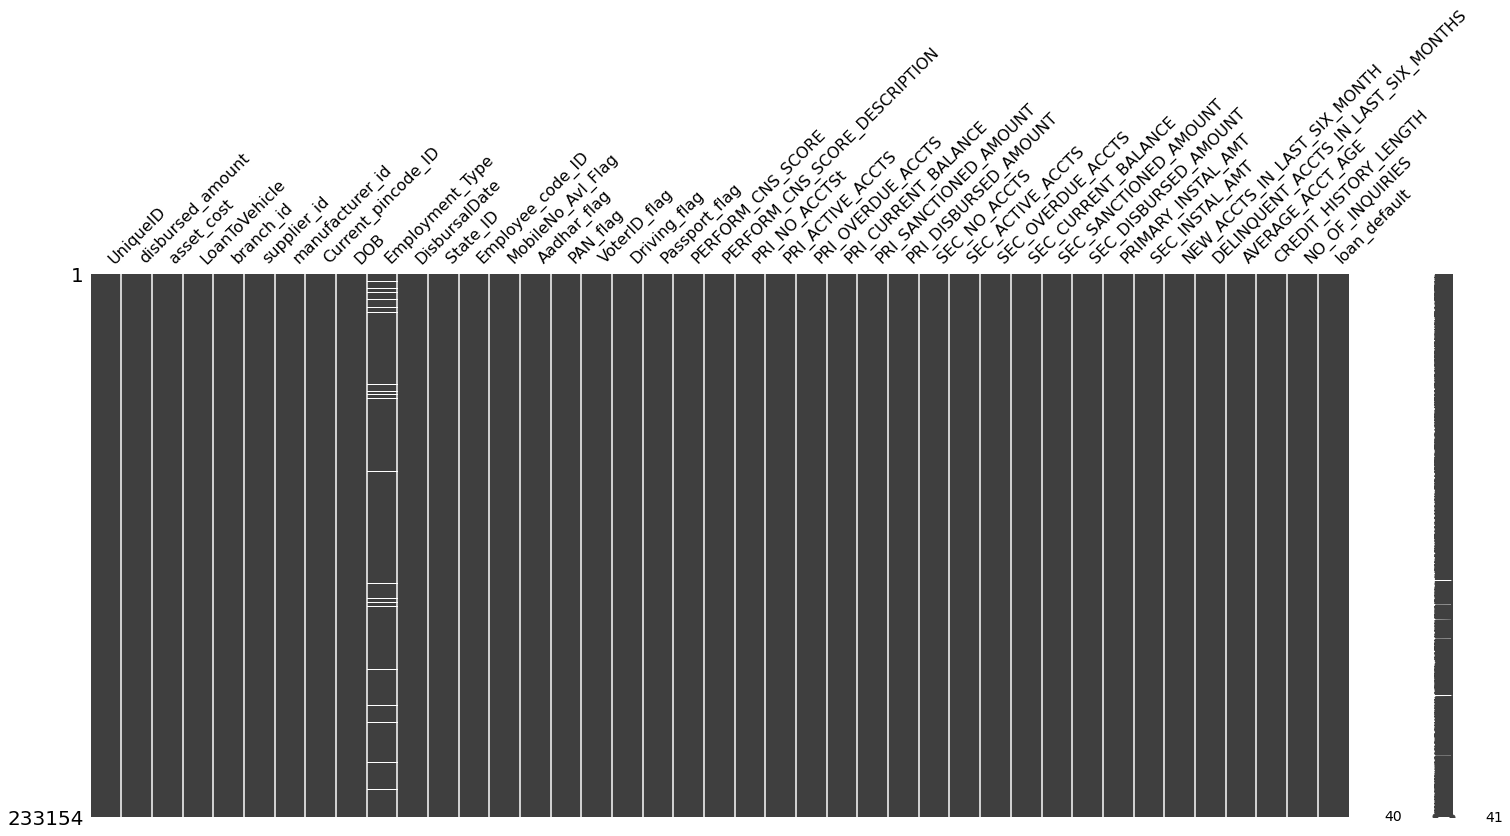

In [8]:
# Visiualize missing values
msno.matrix(loan_data)

In [9]:
#Replacing missing values in categorical variables
loan_data["Employment_Type"].fillna(loan_data["Employment_Type"].mode()[0],inplace=True)

<AxesSubplot:>

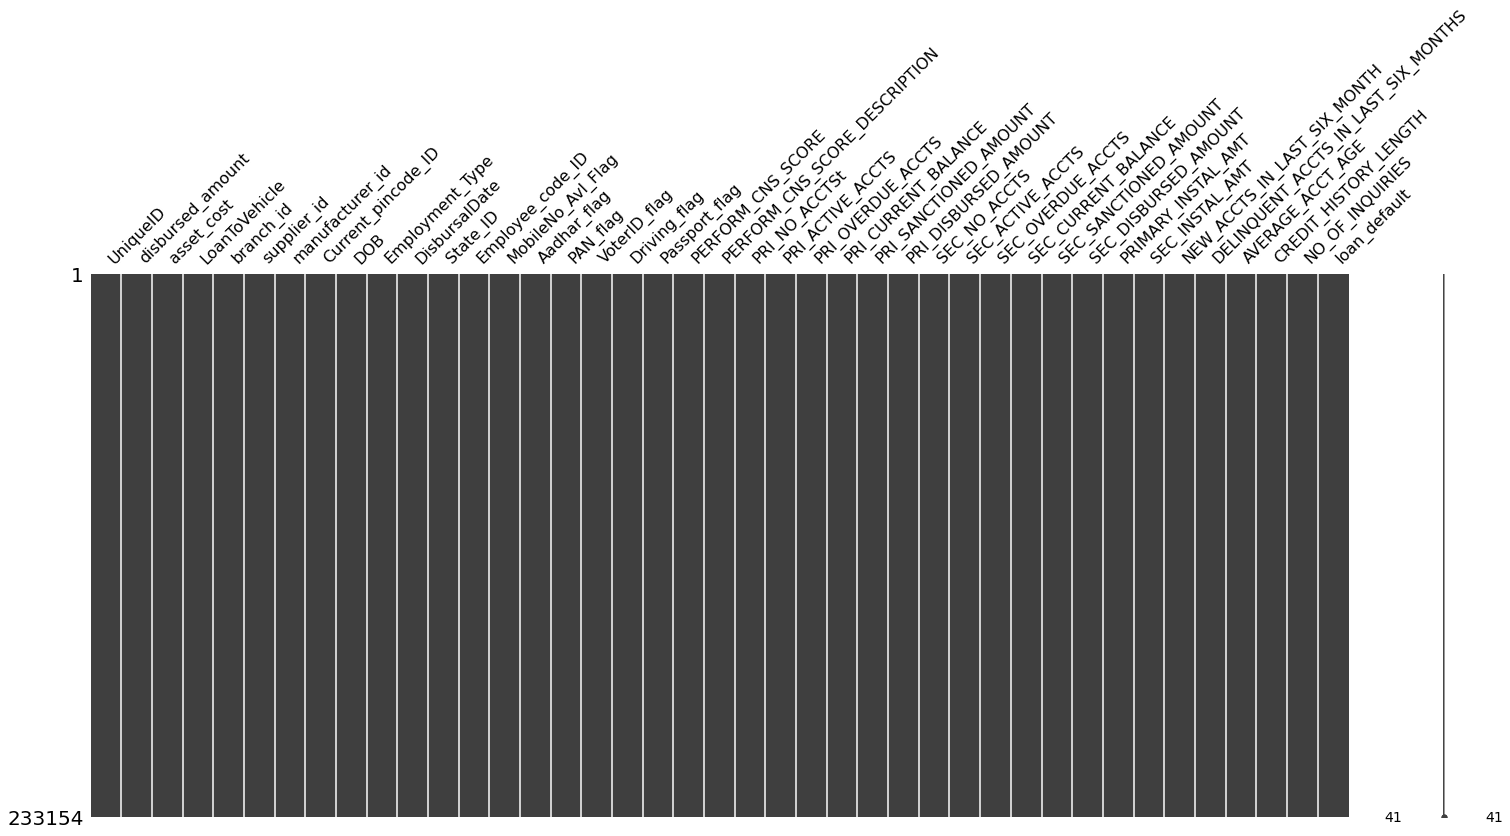

In [10]:
# Visiualize Replaced  values
msno.matrix(loan_data)

In [11]:
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [12]:
#Replacing PERFORM_CNS_SCORE_DESCRIPTION 
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("No Bureau History Available",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: Sufficient History Not Available",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: Not Enough Info available on the customer",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: No Activity seen on the customer (Inactive)",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: No Updates available in last 36 months",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: Only a Guarantor",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("Not Scored: More than 50 active Accounts found",0)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("M-Very High Risk",1)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("L-Very High Risk",1)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("J-High Risk",2)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("K-High Risk",2)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("I-Medium Risk",3)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("H-Medium Risk",3)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("E-Low Risk",4)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("F-Low Risk",4)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("G-Low Risk",4)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("C-Very Low Risk",5)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("A-Very Low Risk",5)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("D-Very Low Risk",5)
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"]=loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].replace("B-Very Low Risk",5)


In [13]:
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].value_counts()

0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [14]:
loan_data["loan_default"].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [15]:
loan_data["Employment_Type"].value_counts()

Self employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

In [16]:
loan_data.replace({"Employment_Type" :{"Self employed":0,"Salaried":1}},inplace=True)

In [17]:
loan_data["Employment_Type"].value_counts()

0    135296
1     97858
Name: Employment_Type, dtype: int64

# Data Visualization

### Univariate Visualization

##### CATEGORICAL VARIABLES

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

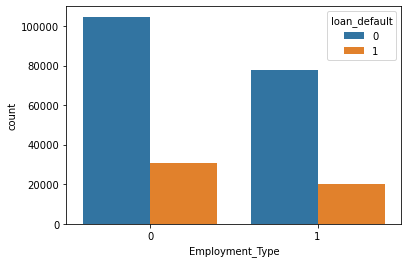

In [18]:
sns.countplot(x="Employment_Type",hue="loan_default",data=loan_data)

###### Self-Employed customers seems to default more 

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='branch_id', ylabel='count'>

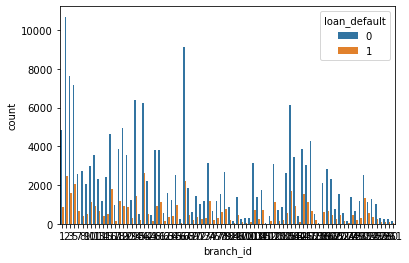

In [19]:
sns.countplot(loan_data["branch_id"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='manufacturer_id', ylabel='count'>

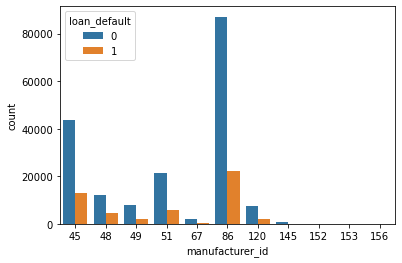

In [20]:
sns.countplot(loan_data["manufacturer_id"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_ID', ylabel='count'>

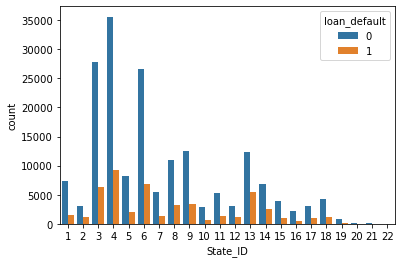

In [21]:
sns.countplot(loan_data["State_ID"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NEW_ACCTS_IN_LAST_SIX_MONTH', ylabel='count'>

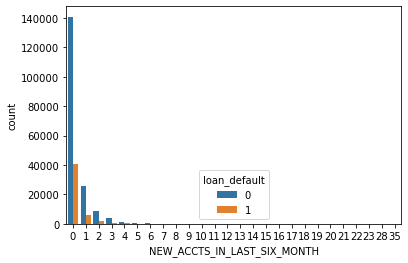

In [22]:
sns.countplot(loan_data["NEW_ACCTS_IN_LAST_SIX_MONTH"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', ylabel='count'>

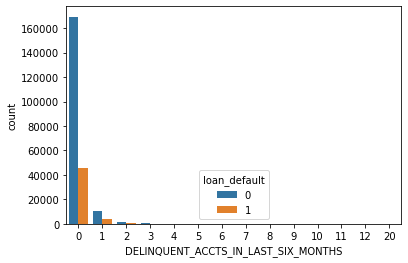

In [23]:
sns.countplot(loan_data["DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NO_OF_INQUIRIES', ylabel='count'>

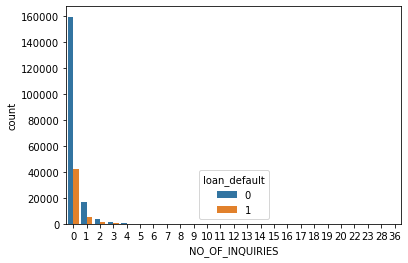

In [24]:
sns.countplot(loan_data['NO_OF_INQUIRIES'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

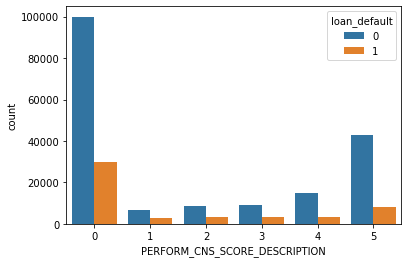

In [25]:
sns.countplot(loan_data["PERFORM_CNS_SCORE_DESCRIPTION"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aadhar_flag', ylabel='count'>

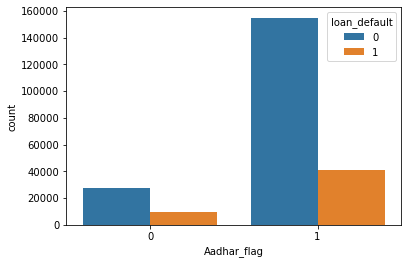

In [26]:
sns.countplot(loan_data["Aadhar_flag"],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PAN_flag', ylabel='count'>

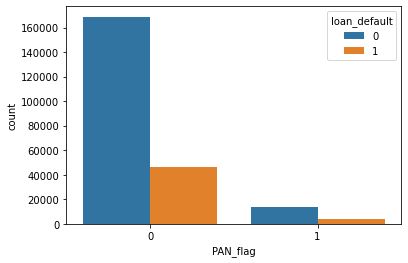

In [27]:
sns.countplot(loan_data['PAN_flag'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VoterID_flag', ylabel='count'>

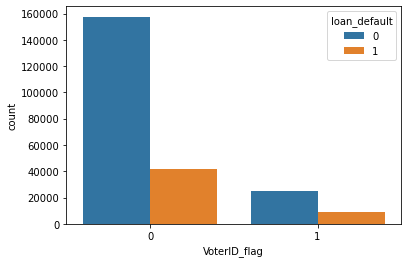

In [28]:
sns.countplot(loan_data['VoterID_flag'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driving_flag', ylabel='count'>

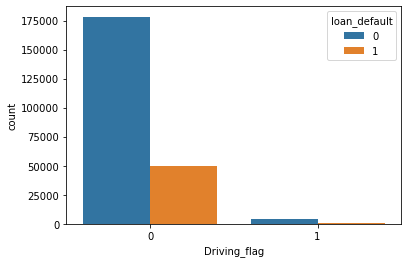

In [29]:
sns.countplot(loan_data['Driving_flag'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passport_flag', ylabel='count'>

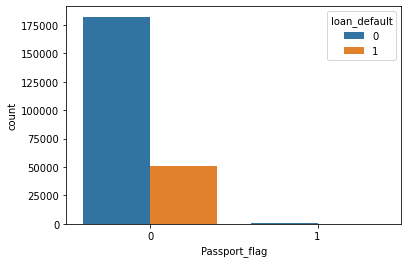

In [30]:
sns.countplot(loan_data['Passport_flag'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_default', ylabel='count'>

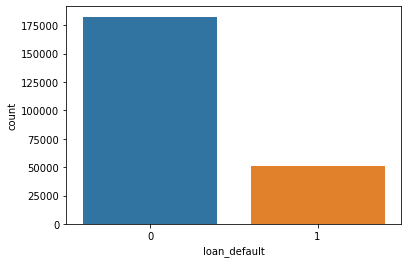

In [31]:
sns.countplot(loan_data['loan_default'])

####    OBSERVATIONS :
###### 1.It can be seen different branches of bank, different Employment type, different manufacturer or state has different proportions of loans sanctioned.
###### 2.The barplot of "NEW_ACCTS_IN_LAST_SIX_MONTH" and "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS" suggests that More than 80 percent customers have 0 default accounts in last six months or zero new loans taken in last six months before disbursement
###### 3. The proportion of customer defaulting is less.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRI_ACTIVE_ACCTS', ylabel='count'>

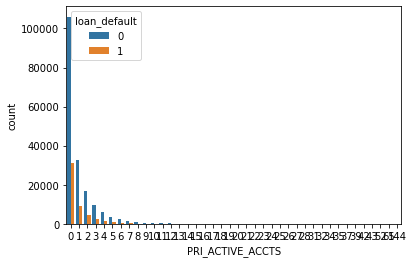

In [32]:
sns.countplot(loan_data['PRI_ACTIVE_ACCTS'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRI_OVERDUE_ACCTS', ylabel='count'>

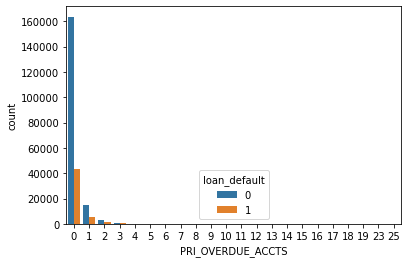

In [33]:
sns.countplot(loan_data['PRI_OVERDUE_ACCTS'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEC_OVERDUE_ACCTS', ylabel='count'>

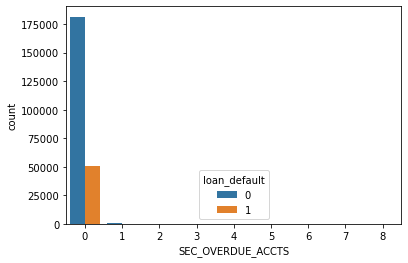

In [34]:
sns.countplot(loan_data['SEC_OVERDUE_ACCTS'],hue="loan_default",data=loan_data)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEC_ACTIVE_ACCTS', ylabel='count'>

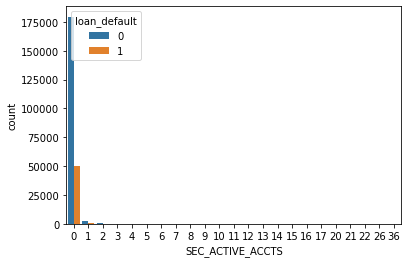

In [35]:
sns.countplot(loan_data['SEC_ACTIVE_ACCTS'],hue="loan_default",data=loan_data)

####  NUMERICAL VARIABLES

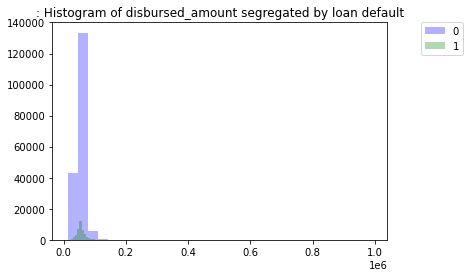

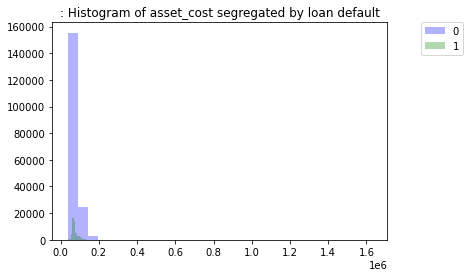

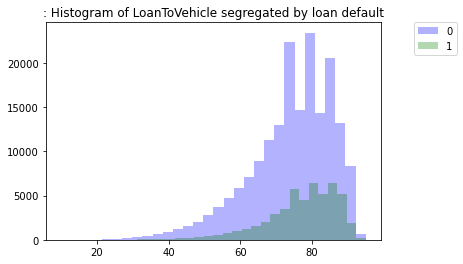

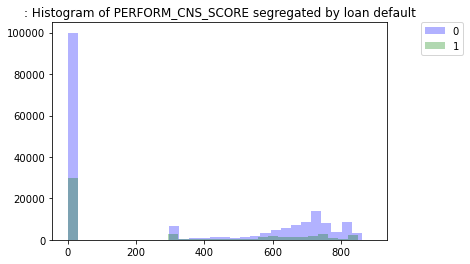

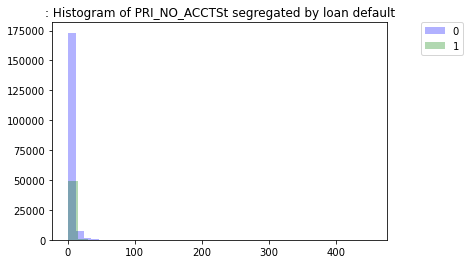

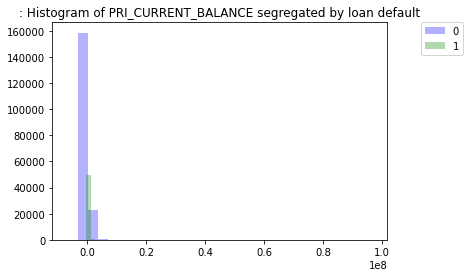

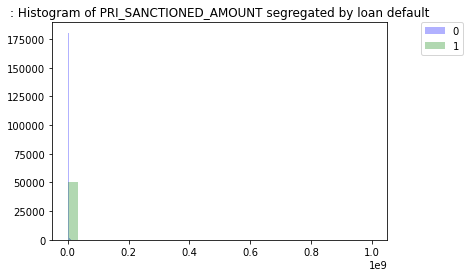

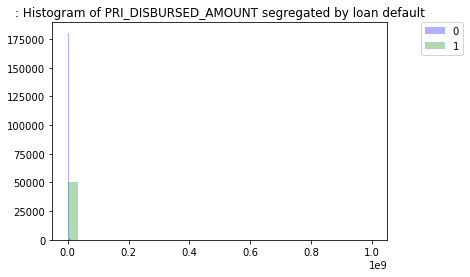

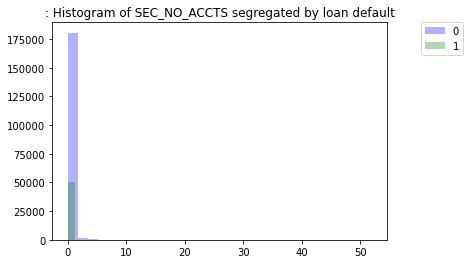

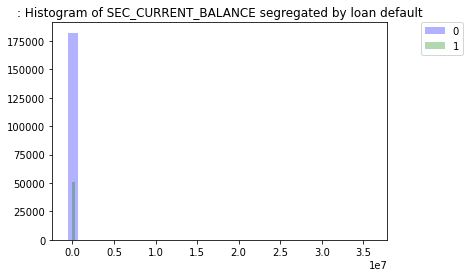

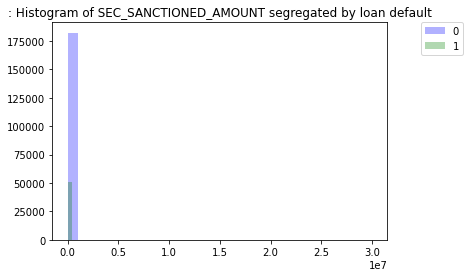

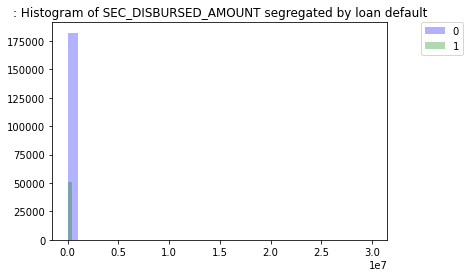

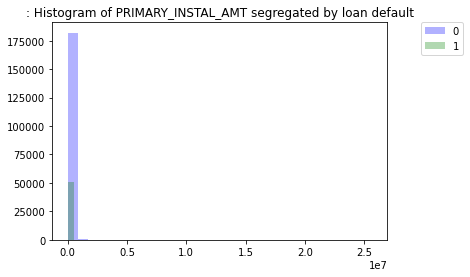

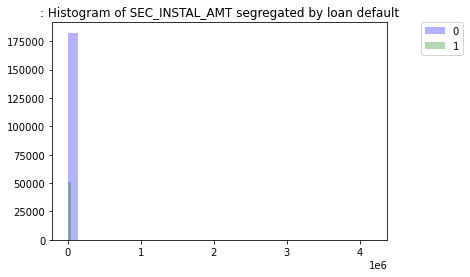

In [36]:
for col in ["disbursed_amount","asset_cost","LoanToVehicle","PERFORM_CNS_SCORE","PRI_NO_ACCTSt","PRI_CURRENT_BALANCE","PRI_SANCTIONED_AMOUNT",
                       "PRI_DISBURSED_AMOUNT","SEC_NO_ACCTS","SEC_CURRENT_BALANCE","SEC_SANCTIONED_AMOUNT","SEC_DISBURSED_AMOUNT","PRIMARY_INSTAL_AMT","SEC_INSTAL_AMT"]:
    data1=loan_data.loc[loan_data["loan_default"]==0,col]
    data2=loan_data.loc[loan_data["loan_default"]==1,col]
    plt.hist(data1,alpha=0.3,bins=30,color='blue')
    plt.hist(data2,alpha=0.3,bins=30,color='green')
    plt.title(": Histogram of " + col + " " "segregated by loan default" )
    plt.legend(loan_data["loan_default"].unique(),bbox_to_anchor=(1.10,1),loc=2,borderaxespad=0)
    plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disbursed_amount', ylabel='Density'>

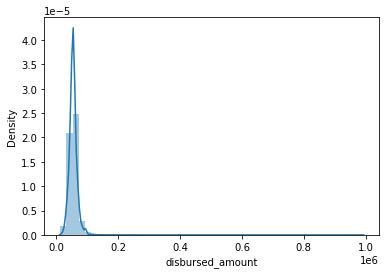

In [37]:
sns.distplot(loan_data["disbursed_amount"])

<AxesSubplot:xlabel='disbursed_amount'>

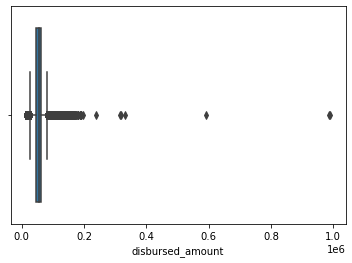

In [38]:
sns.boxplot(x=loan_data["disbursed_amount"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='asset_cost', ylabel='Density'>

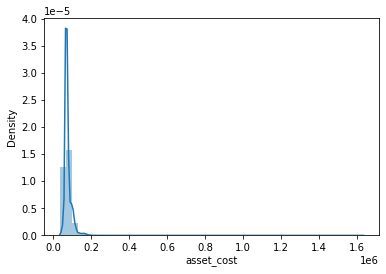

In [39]:
sns.distplot(loan_data["asset_cost"])

<AxesSubplot:xlabel='asset_cost'>

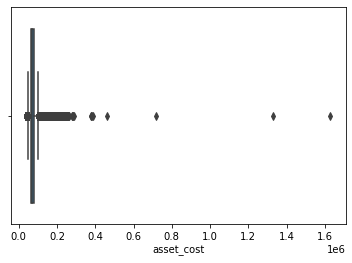

In [40]:
sns.boxplot(x=loan_data['asset_cost'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanToVehicle', ylabel='Density'>

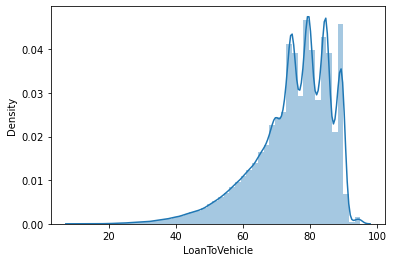

In [41]:
sns.distplot(loan_data["LoanToVehicle"])

<AxesSubplot:xlabel='LoanToVehicle'>

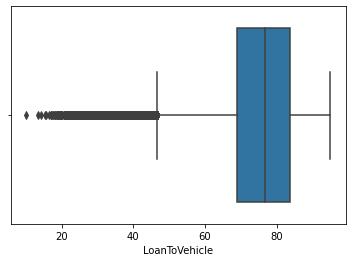

In [42]:
sns.boxplot(x=loan_data["LoanToVehicle"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='Density'>

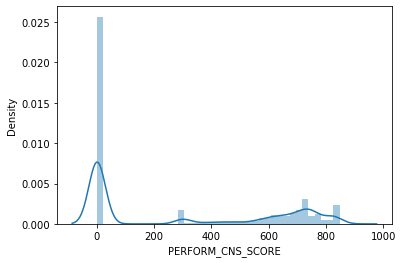

In [43]:
sns.distplot(loan_data["PERFORM_CNS_SCORE"])

<AxesSubplot:xlabel='PERFORM_CNS_SCORE'>

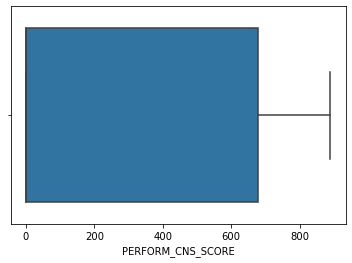

In [44]:
sns.boxplot(x=loan_data["PERFORM_CNS_SCORE"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRI_NO_ACCTSt', ylabel='Density'>

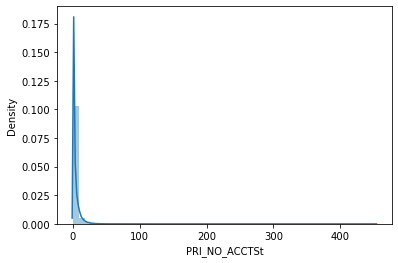

In [45]:
sns.distplot(loan_data["PRI_NO_ACCTSt"])

<AxesSubplot:xlabel='PRI_NO_ACCTSt'>

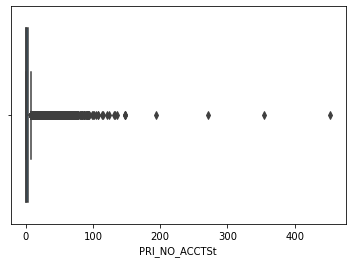

In [46]:
sns.boxplot(x=loan_data["PRI_NO_ACCTSt"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRI_CURRENT_BALANCE', ylabel='Density'>

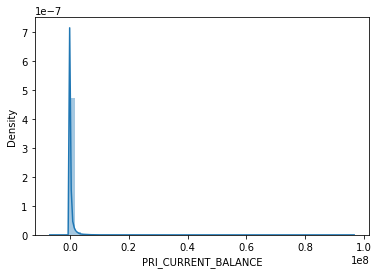

In [47]:
sns.distplot(loan_data["PRI_CURRENT_BALANCE"])

<AxesSubplot:xlabel='PRI_CURRENT_BALANCE'>

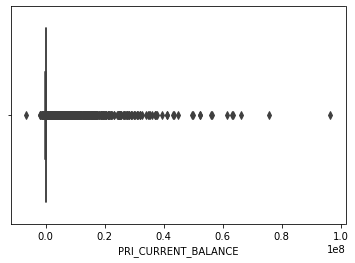

In [48]:
sns.boxplot(x=loan_data["PRI_CURRENT_BALANCE"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRI_SANCTIONED_AMOUNT', ylabel='Density'>

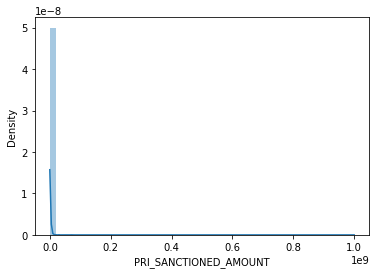

In [49]:
sns.distplot(loan_data["PRI_SANCTIONED_AMOUNT"])

<AxesSubplot:xlabel='PRI_SANCTIONED_AMOUNT'>

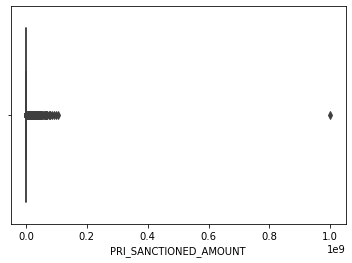

In [50]:
sns.boxplot(x=loan_data["PRI_SANCTIONED_AMOUNT"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRI_DISBURSED_AMOUNT', ylabel='Density'>

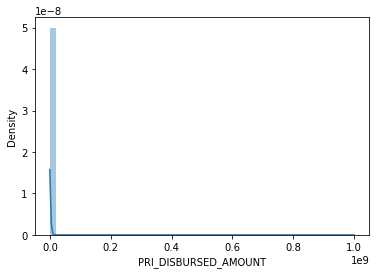

In [51]:
sns.distplot(loan_data["PRI_DISBURSED_AMOUNT"])

<AxesSubplot:xlabel='PRI_DISBURSED_AMOUNT'>

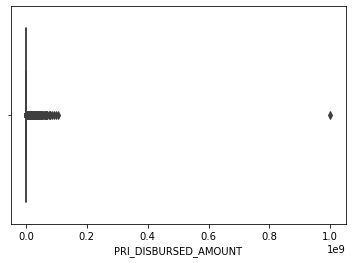

In [52]:
sns.boxplot(x=loan_data["PRI_DISBURSED_AMOUNT"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SEC_NO_ACCTS', ylabel='Density'>

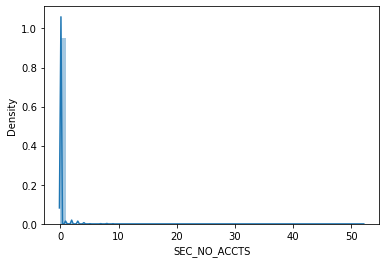

In [53]:
sns.distplot(loan_data["SEC_NO_ACCTS"])

<AxesSubplot:xlabel='SEC_NO_ACCTS'>

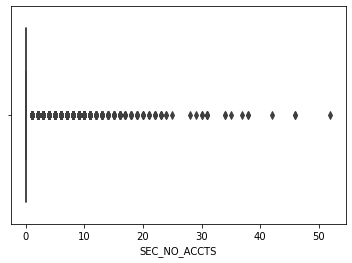

In [54]:
sns.boxplot(x=loan_data["SEC_NO_ACCTS"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SEC_CURRENT_BALANCE', ylabel='Density'>

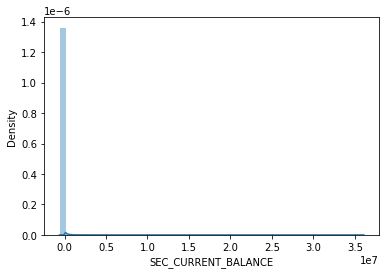

In [55]:
sns.distplot(loan_data["SEC_CURRENT_BALANCE"])

<AxesSubplot:xlabel='SEC_CURRENT_BALANCE'>

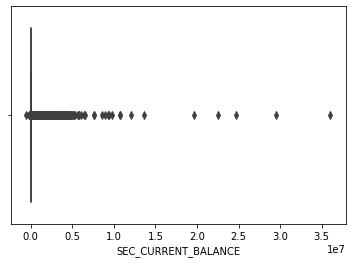

In [56]:
sns.boxplot(x=loan_data["SEC_CURRENT_BALANCE"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SEC_SANCTIONED_AMOUNT', ylabel='Density'>

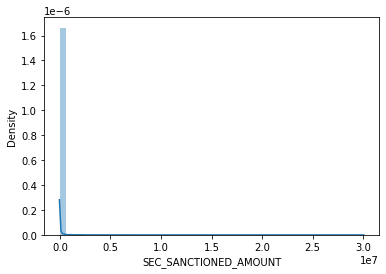

In [57]:
sns.distplot(loan_data["SEC_SANCTIONED_AMOUNT"])

<AxesSubplot:xlabel='SEC_SANCTIONED_AMOUNT'>

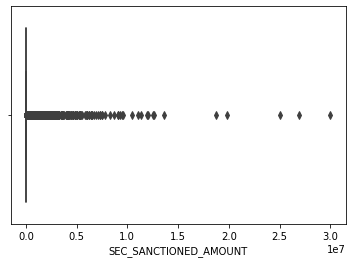

In [58]:
sns.boxplot(x=loan_data["SEC_SANCTIONED_AMOUNT"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SEC_DISBURSED_AMOUNT', ylabel='Density'>

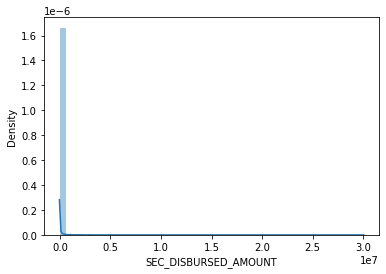

In [59]:
sns.distplot(loan_data["SEC_DISBURSED_AMOUNT"])

<AxesSubplot:xlabel='SEC_DISBURSED_AMOUNT'>

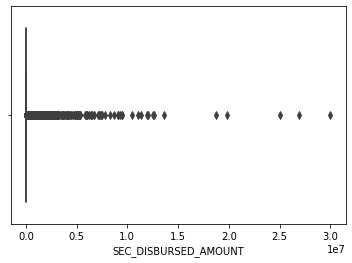

In [60]:
sns.boxplot(x=loan_data["SEC_DISBURSED_AMOUNT"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRIMARY_INSTAL_AMT', ylabel='Density'>

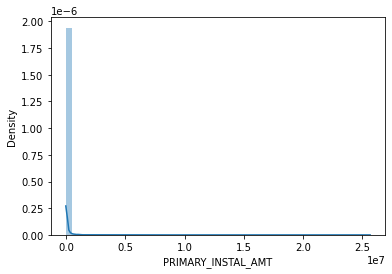

In [61]:
sns.distplot(loan_data["PRIMARY_INSTAL_AMT"])

<AxesSubplot:xlabel='PRIMARY_INSTAL_AMT'>

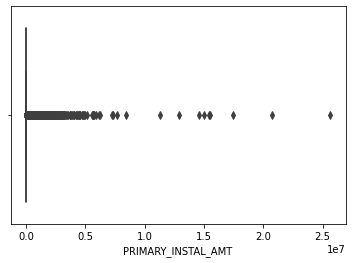

In [62]:
sns.boxplot(x=loan_data["PRIMARY_INSTAL_AMT"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SEC_INSTAL_AMT', ylabel='Density'>

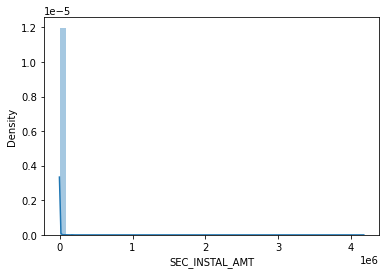

In [63]:
sns.distplot(loan_data["SEC_INSTAL_AMT"])

<AxesSubplot:xlabel='SEC_INSTAL_AMT'>

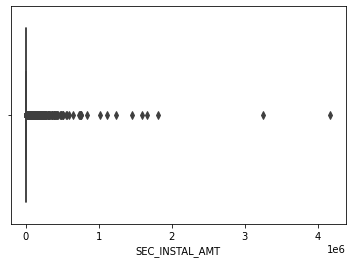

In [64]:
sns.boxplot(x=loan_data["SEC_INSTAL_AMT"])

####    OBSERVATIONS:
###### 1. Distribution of  disbursed_amount and asset_cost shows approximately normally distributed values with outliers.
###### 2.Large proportion of "PERFORM_CNS_SCORE" falls on zero.
###### 3.Graph of LoanToVehicle has outliers and multiple spike.
###### 4.Rest of the attributes have majority of values near to zero compare to other values. i.e the data of  PRI_NO_ACCOUNTS,      PRI_CURRENT_BALANCE, PRI_SANCTIONED_AMOUNT, PRI_DISBURSED_AMOUNT, SEC_NO_ACCOUNTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT, SEC_DISBURSED_AMOUNT ,PRI_INSTAL_AMT and SEC_INSTAL_AMT are having higher upper bound outliers with rest the values in range.


In [66]:
# Removing Loan_id
loan_data.drop(labels=["UniqueID","branch_id","Current_pincode_ID","Employee_code_ID","supplier_id","DisbursalDate","State_ID","manufacturer_id"],axis=1,inplace=True)

In [67]:
categoricalcolumn = ["Employment_Type","NEW_ACCTS_IN_LAST_SIX_MONTH","DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS","NO_OF_INQUIRIES","loan_default"]
for col in categoricalcolumn:
    print("Value Counts for " +col)
    print(loan_data[col].value_counts)
    print("")



Value Counts for Employment_Type
<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         0
3         0
4         0
         ..
233149    1
233150    0
233151    1
233152    1
233153    1
Name: Employment_Type, Length: 233154, dtype: int64>

Value Counts for NEW_ACCTS_IN_LAST_SIX_MONTH
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: NEW_ACCTS_IN_LAST_SIX_MONTH, Length: 233154, dtype: int64>

Value Counts for DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
<bound method IndexOpsMixin.value_counts of 0         0
1         1
2         0
3         0
4         0
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, Length: 233154, dtype: int64>

Value Counts for NO_OF_INQUIRIES
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         1
4         1
         .

In [68]:
loan_data['DOB'] = pd.to_datetime(loan_data['DOB'], format = "%d-%m-%y",infer_datetime_format=True)

In [69]:
from datetime import date 
def calage(birthdate):
    today=date.today()
    age=today.year-birthdate.year-((today.month,today.day)<(birthdate.month,birthdate.day))
    return age

In [70]:
loan_data['Age']=loan_data["DOB"].apply(calage)

In [71]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [72]:
loan_data["Avg_Acct_Age"]=loan_data["AVERAGE_ACCT_AGE"].apply(duration)
loan_data["Credit_Acct_Age"]=loan_data["CREDIT_HISTORY_LENGTH"].apply(duration)

In [73]:
loan_data

,disbursed_amount,asset_cost,LoanToVehicle,DOB,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTH,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,Avg_Acct_Age,Credit_Acct_Age
0,50578,58400,89.55,1984-01-01,1,1,1,0,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,38,0,0
1,47145,65550,73.23,1985-07-31,0,1,1,0,0,0,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,36,23,23
2,53278,61360,89.63,1985-08-24,0,1,1,0,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,36,0,0
3,57513,66113,88.48,1993-12-30,0,1,1,0,0,0,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,28,8,15
4,52378,60300,88.39,1977-09-12,0,1,1,0,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,1988-01-08,1,1,0,0,1,0,...,0,0,0,1yrs 9mon,3yrs 3mon,0,0,34,21,39
233150,73651,100600,74.95,1988-05-12,0,1,0,0,1,0,...,0,0,0,0yrs 6mon,0yrs 6mon,0,0,34,6,6
233151,33484,71212,48.45,1976-01-06,1,1,1,0,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,46,0,0
233152,34259,73286,49.10,1994-03-26,1,1,1,0,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,28,0,0


In [74]:
#columns to drop 
columns_to_drop=["DOB","AVERAGE_ACCT_AGE","CREDIT_HISTORY_LENGTH"]
loan_data.drop(columns_to_drop, axis=1,inplace=True)

In [75]:
loan_data

,disbursed_amount,asset_cost,LoanToVehicle,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTH,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,Age,Avg_Acct_Age,Credit_Acct_Age
0,50578,58400,89.55,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,38,0,0
1,47145,65550,73.23,0,1,1,0,0,0,0,...,0,1991,0,0,1,0,1,36,23,23
2,53278,61360,89.63,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0
3,57513,66113,88.48,0,1,1,0,0,0,0,...,0,31,0,0,0,1,1,28,8,15
4,52378,60300,88.39,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,1,1,0,0,1,0,0,...,0,4084,0,0,0,0,0,34,21,39
233150,73651,100600,74.95,0,1,0,0,1,0,0,...,0,1565,0,0,0,0,0,34,6,6
233151,33484,71212,48.45,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,46,0,0
233152,34259,73286,49.10,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,28,0,0


In [76]:
numerical=["disbursed_amount","asset_cost","LoanToVehicle","PRI_NO_ACCTSt","PRI_ACTIVE_ACCTS","PRI_OVERDUE_ACCTS","PRI_CURRENT_BALANCE","PRI_DISBURSED_AMOUNT","PRI_SANCTIONED_AMOUNT","SEC_NO_ACCTS","SEC_ACTIVE_ACCTS","SEC_OVERDUE_ACCTS","SEC_CURRENT_BALANCE","SEC_SANCTIONED_AMOUNT"
    ,"SEC_DISBURSED_AMOUNT","PRIMARY_INSTAL_AMT","SEC_INSTAL_AMT","Credit_Acct_Age","Avg_Acct_Age","Age","NEW_ACCTS_IN_LAST_SIX_MONTH","DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS","NO_OF_INQUIRIES","PERFORM_CNS_SCORE"]
categorical=["Employment_Type","MobileNo_Avl_Flag","Passport_flag","Driving_flag","VoterID_flag","PAN_flag","Aadhar_flag","PERFORM_CNS_SCORE_DESCRIPTION"]

In [78]:
loan_data["No_of_Accts"]=loan_data["PRI_NO_ACCTSt"]+loan_data["SEC_NO_ACCTS"]
loan_data["PRI_Inactive_Accts"]=loan_data["PRI_NO_ACCTSt"]-loan_data["PRI_ACTIVE_ACCTS"]
loan_data["SEC_Inactive_Accts"]=loan_data["SEC_NO_ACCTS"]-loan_data["SEC_ACTIVE_ACCTS"]
loan_data["Total_Inactive_Accts"]=loan_data["PRI_Inactive_Accts"]+loan_data["SEC_Inactive_Accts"]
loan_data["Total_Overdue_Accts"]=loan_data["PRI_OVERDUE_ACCTS"]+loan_data["SEC_OVERDUE_ACCTS"]
loan_data["Total_Current_Balance"]=loan_data["PRI_CURRENT_BALANCE"]+loan_data["SEC_CURRENT_BALANCE"]
loan_data["Total_Sanctioned_Amount"]=loan_data["PRI_SANCTIONED_AMOUNT"]+loan_data["SEC_SANCTIONED_AMOUNT"]
loan_data["Total_Disbursed_Amount"]=loan_data["PRI_DISBURSED_AMOUNT"]+loan_data["SEC_DISBURSED_AMOUNT"]
loan_data["Total_Installment"]=loan_data["PRIMARY_INSTAL_AMT"]-loan_data["SEC_INSTAL_AMT"]


In [79]:
loan_data.drop(["PRI_NO_ACCTSt","SEC_NO_ACCTS","PRI_ACTIVE_ACCTS","SEC_ACTIVE_ACCTS","PRI_OVERDUE_ACCTS","SEC_OVERDUE_ACCTS","PRI_CURRENT_BALANCE","SEC_CURRENT_BALANCE",
               "PRI_SANCTIONED_AMOUNT","SEC_SANCTIONED_AMOUNT","PRI_DISBURSED_AMOUNT","SEC_DISBURSED_AMOUNT","PRIMARY_INSTAL_AMT","SEC_INSTAL_AMT","PRI_Inactive_Accts","SEC_Inactive_Accts","asset_cost"],axis=1,inplace=True)

In [80]:
#Transform the numerical feature into categorical feature
loan_data['"Employment_Type"'] = loan_data["Employment_Type"].astype('object')
loan_data["MobileNo_Avl_Flag"] = loan_data["MobileNo_Avl_Flag"].astype('object')
loan_data["Passport_flag"] = loan_data["Passport_flag"].astype('object')
loan_data["Driving_flag"] = loan_data["Driving_flag"].astype('object')
loan_data["VoterID_flag"] = loan_data["VoterID_flag"].astype('object')
loan_data["PAN_flag"] = loan_data["PAN_flag"].astype('object')
loan_data["Aadhar_flag"] = loan_data["Aadhar_flag"].astype('object')
loan_data["PERFORM_CNS_SCORE_DESCRIPTION"] = loan_data["PERFORM_CNS_SCORE_DESCRIPTION"].astype('object')



In [82]:
columns_to_drop=["MobileNo_Avl_Flag","PAN_flag","Passport_flag","Driving_flag","VoterID_flag","Aadhar_flag"]
loan_data.drop(columns_to_drop,axis=1,inplace=True)

In [83]:
loan_data

,disbursed_amount,LoanToVehicle,Employment_Type,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTH,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,Age,Avg_Acct_Age,Credit_Acct_Age,No_of_Accts,Total_Inactive_Accts,Total_Overdue_Accts,Total_Current_Balance,Total_Sanctioned_Amount,Total_Disbursed_Amount,Total_Installment,"""Employment_Type"""
0,50578,89.55,1,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,1
1,47145,73.23,0,598,3,0,1,0,1,36,23,23,1,0,1,27600,50200,50200,1991,0
2,53278,89.63,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0
3,57513,88.48,0,305,1,0,0,1,1,28,8,15,3,3,0,0,0,0,31,0
4,52378,88.39,0,0,0,0,0,1,1,44,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,60.72,1,735,5,0,0,0,0,34,21,39,4,1,0,390443,416133,416133,4084,1
233150,73651,74.95,0,825,5,0,0,0,0,34,6,6,1,1,0,0,0,0,1565,0
233151,33484,48.45,1,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,1
233152,34259,49.10,1,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,1


In [84]:
#seperating Dependent and Independent Variables
X=loan_data.drop(labels=["loan_default"],axis=1)
y=loan_data["loan_default"]
print(X)
print(y)


        disbursed_amount  LoanToVehicle  Employment_Type  PERFORM_CNS_SCORE  \
0                  50578          89.55                1                  0   
1                  47145          73.23                0                598   
2                  53278          89.63                0                  0   
3                  57513          88.48                0                305   
4                  52378          88.39                0                  0   
...                  ...            ...              ...                ...   
233149             63213          60.72                1                735   
233150             73651          74.95                0                825   
233151             33484          48.45                1                  0   
233152             34259          49.10                1                  0   
233153             75751          66.81                1                  0   

       PERFORM_CNS_SCORE_DESCRIPTION  NEW_ACCTS_IN_